In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GmGM import GmGM
from GmGM.synthetic import PrecMatGenerator, DatasetGenerator
from GmGM.synthetic import PrecMatErdosRenyiGilbert
from GmGM.synthetic import measure_prec_recall, plot_prec_recall

Note: I think in this notebook, precision/recall have been flipped...  Keep that in mind while reading!  Am working on a fix.

## Main Takeaways

TODO: This section

Ignore the tests with n_comps, I am unsatisfied with the method of generating relevant graphs.

# Basic Experiments

## Experiment One
Synthetic multi-omics dataset, where true graphs are sparse.

We see that when we only have one sample (common real-world case), it's better to use col-weighted rowwise thresholding.  However, if we have a few samples (here `num_samples=10`), overall thresholding does better.

We also see that shared axes ("cell" here) get better results.

In [2]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


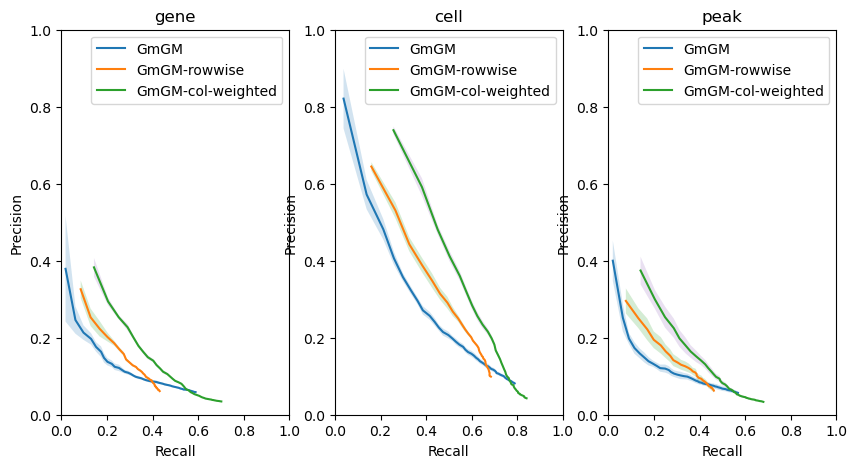

In [3]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


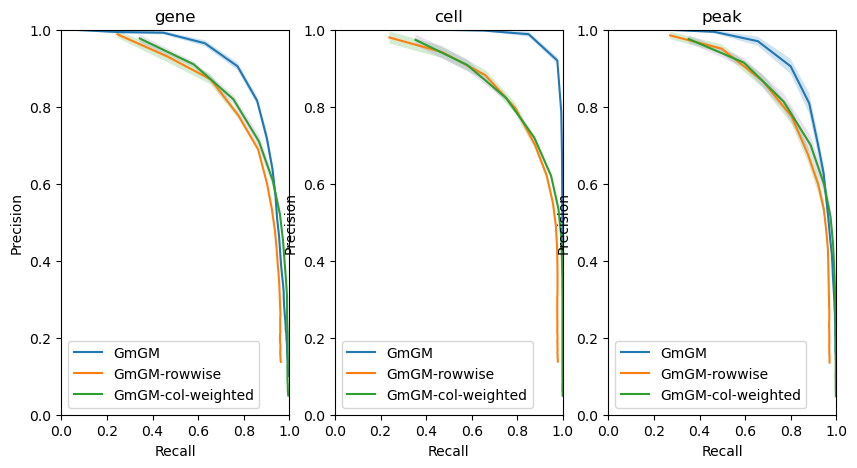

In [4]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Two

When is the principal components approximation okay?

On synthetic data I am not able to make it look okay!  I know from experiments that this approximation is able to work on real data, so more work needs to be done on figuring out why it does not work on synthetic data.

In [5]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

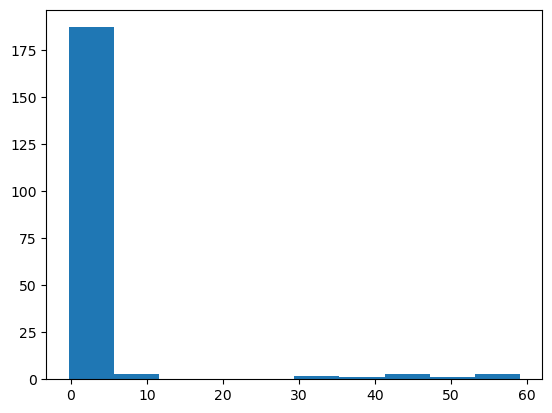

In [6]:
generator.generate()
plt.hist(np.linalg.eigh(generator.Psis["cell"])[0])
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


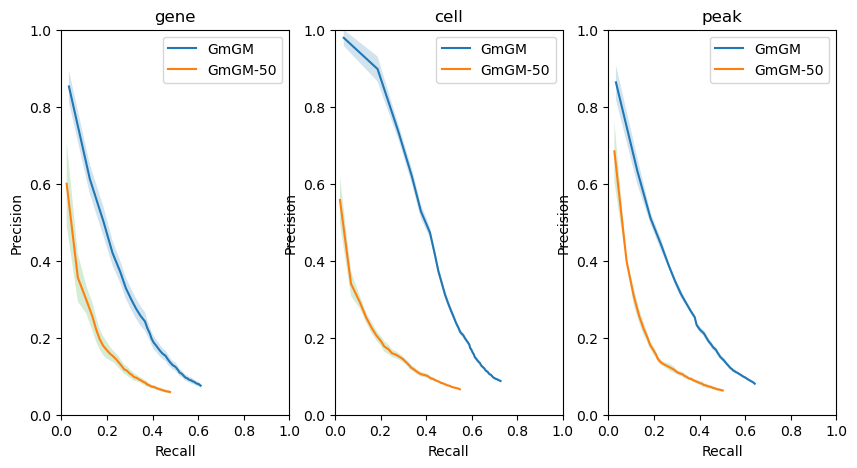

In [7]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


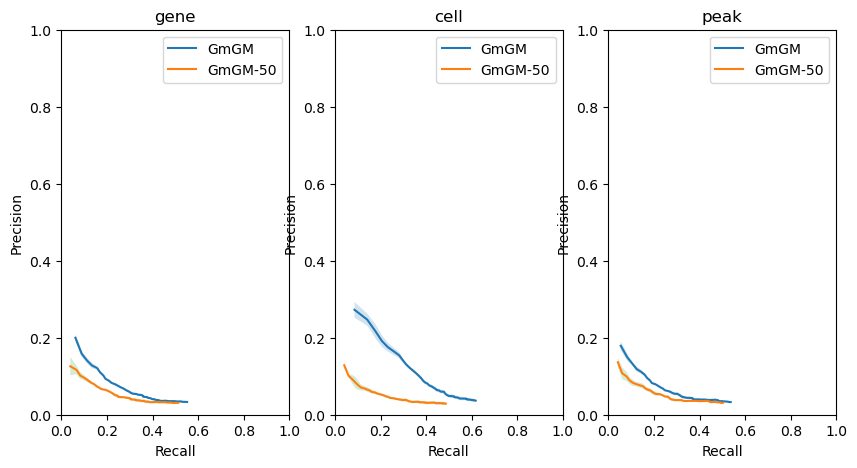

In [8]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


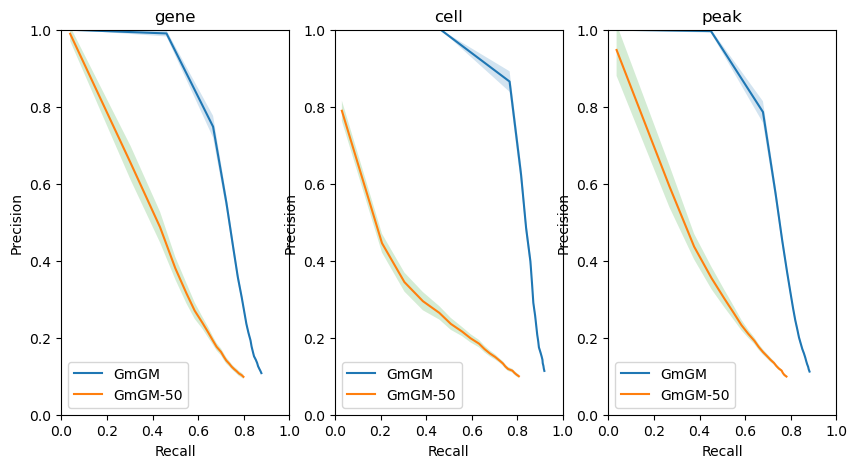

In [10]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


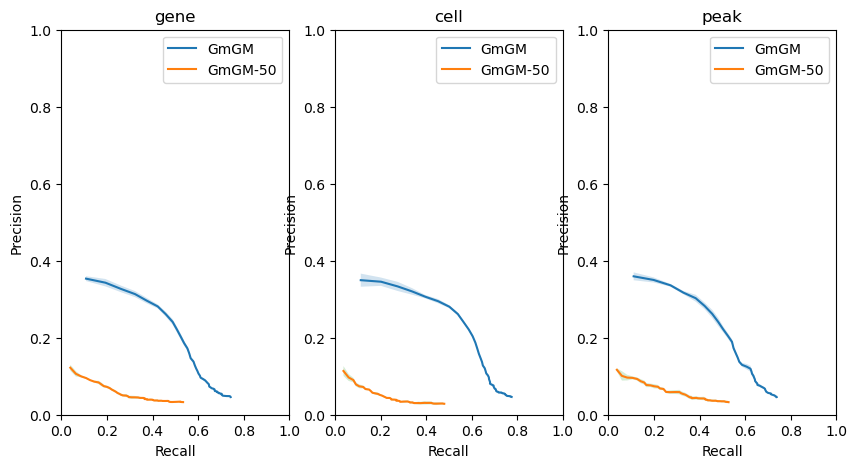

In [11]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Three: Tensor Data

Best to do "overall" thresholding, and we get near-perfect performance with only one sample.  This makes sense as in tensor data, we have "many more" samples (an AxBxC tensor has BC data points for each element along the A axis, compared to an AxB matrix which only has B data points).

In [12]:
generator = DatasetGenerator(
    structure={
        "tensor": ("A", "B", "C"),
    },
    generator={
        "A": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "B": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "C": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "A": 50,
        "B": 50,
        "C": 50
    },
)
generator

<DatasetGenerator, structure=
	tensor: ('', 'A', 'B', 'C')
size=
	A: 50
	B: 50
	C: 50
generator=
	A: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	B: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	C: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	tensor: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


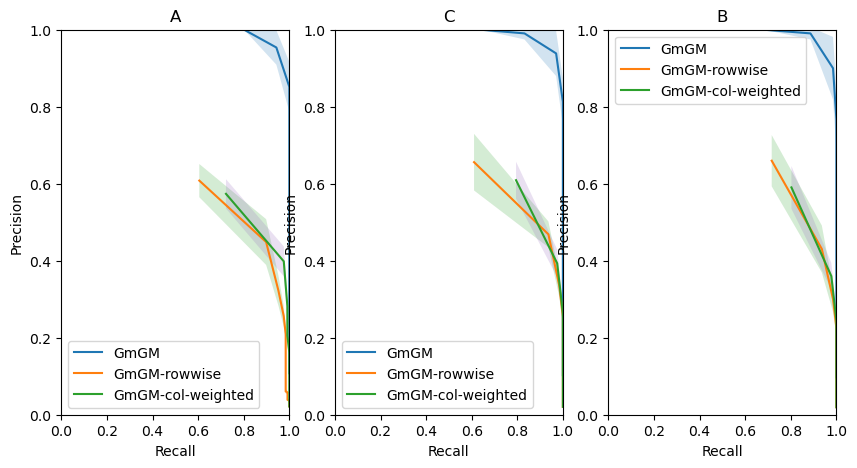

In [13]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


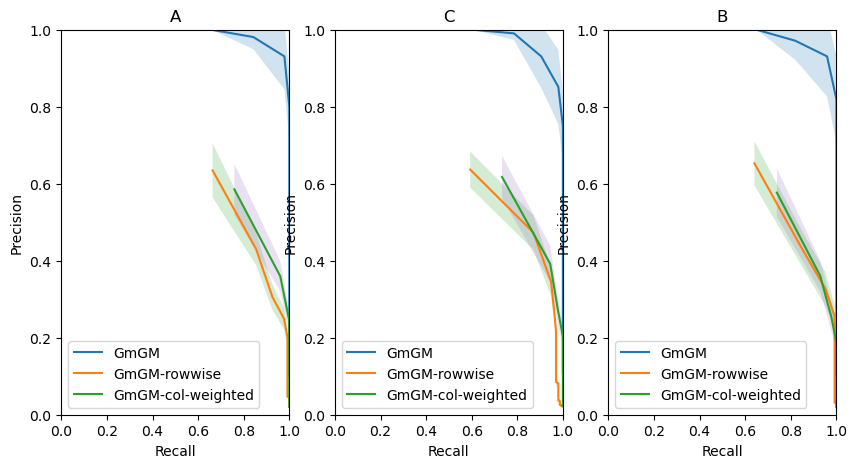

In [14]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Four: Tensor Data, n_comps << size

In [19]:
generator = DatasetGenerator(
    structure={
        "tensor": ("A", "B", "C"),
    },
    generator={
        "A": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "B": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "C": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "A": 50,
        "B": 50,
        "C": 50
    },
)
generator

<DatasetGenerator, structure=
	tensor: ('', 'A', 'B', 'C')
size=
	A: 50
	B: 50
	C: 50
generator=
	A: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	B: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	C: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	tensor: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


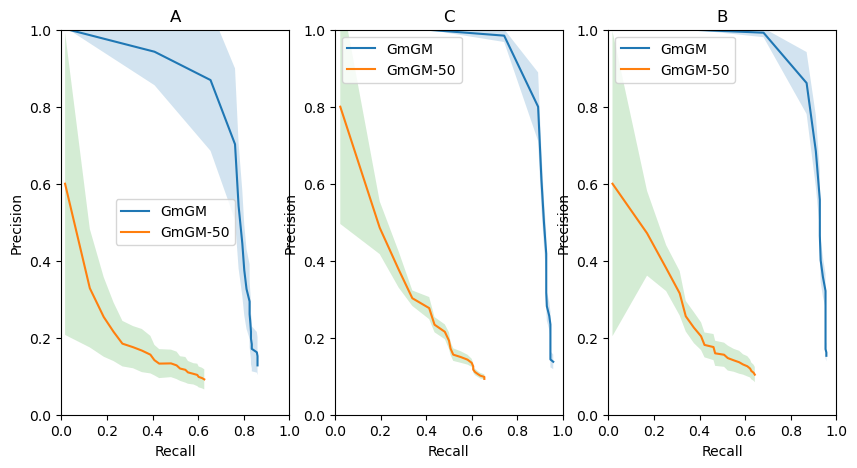

In [20]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


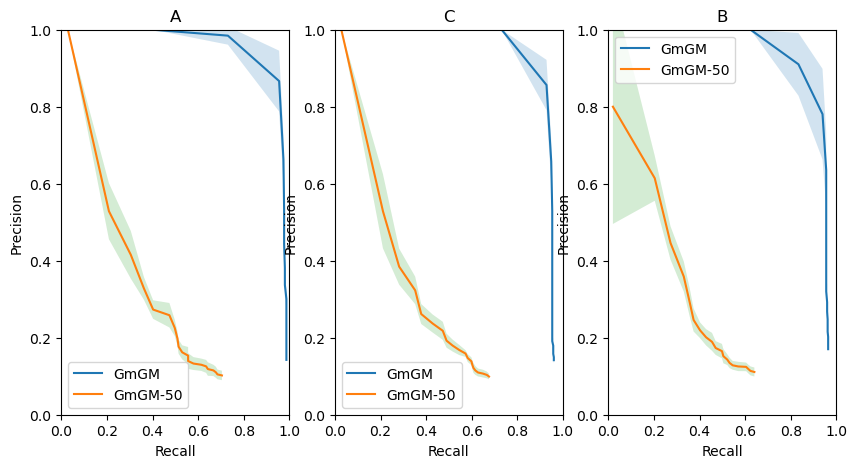

In [21]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Five: Non-normal data

The col-weighting method is the only one that works on non-normal data, it seems.

In [22]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


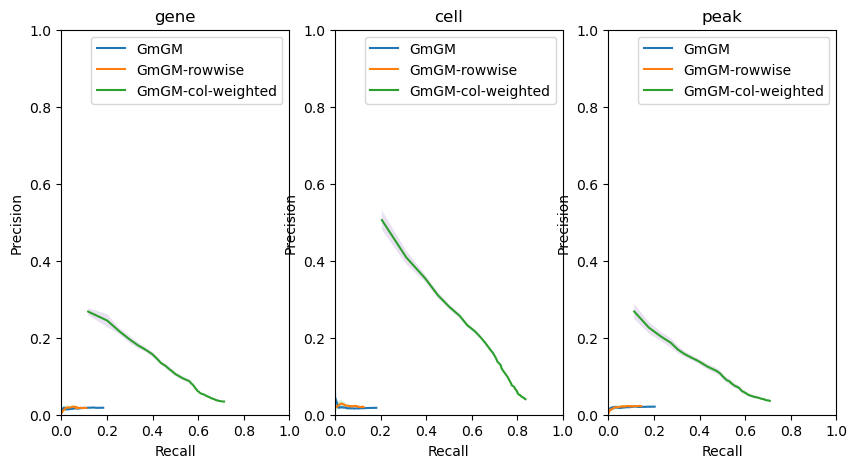

In [23]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


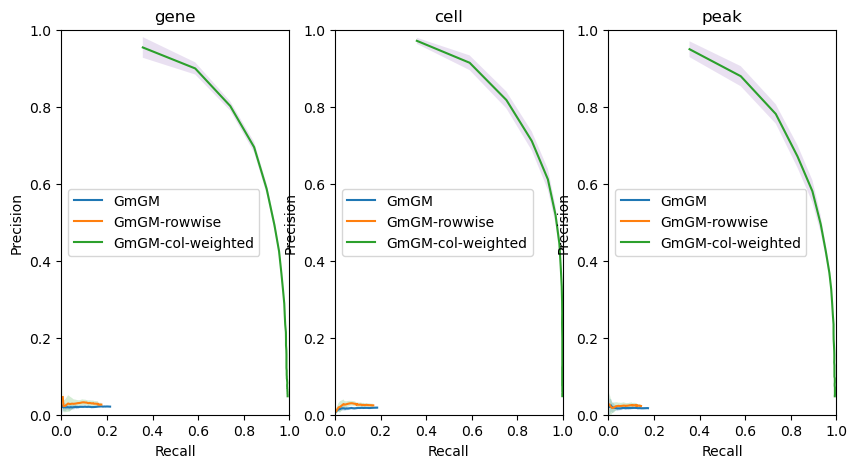

In [24]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Six: Non-normal data, n_comps << size

**On non-normal data, the pricipal components approximation seems to do better than without it!!** (At least in some regimes)

In [25]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


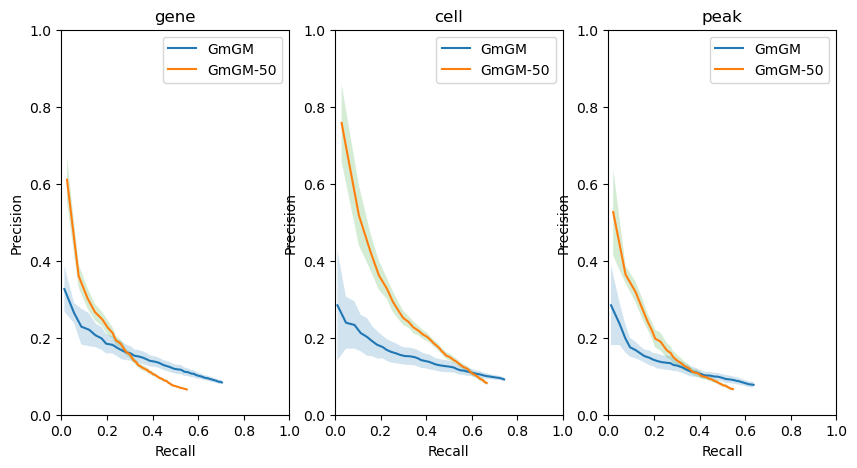

In [26]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


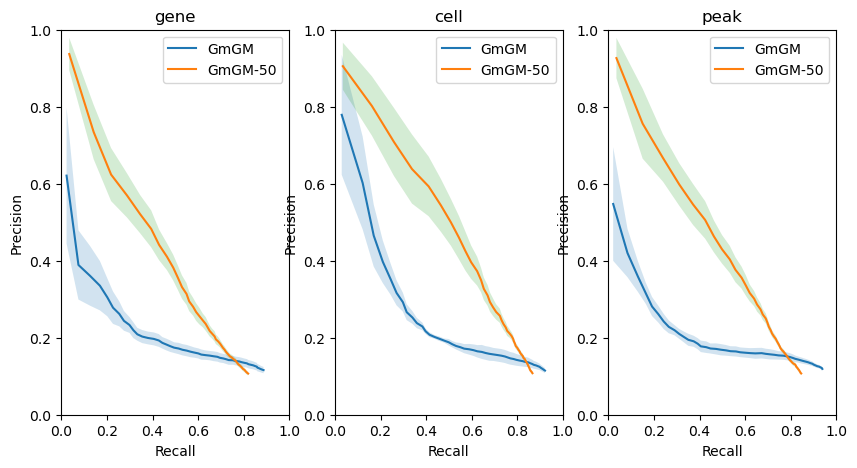

In [27]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Seven: Non-normal tensor data

In [28]:
generator = DatasetGenerator(
    structure={
        "tensor": ("A", "B", "C"),
    },
    generator={
        "A": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "B": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "C": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "A": 50,
        "B": 50,
        "C": 50
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	tensor: ('', 'A', 'B', 'C')
size=
	A: 50
	B: 50
	C: 50
generator=
	A: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	B: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	C: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	tensor: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


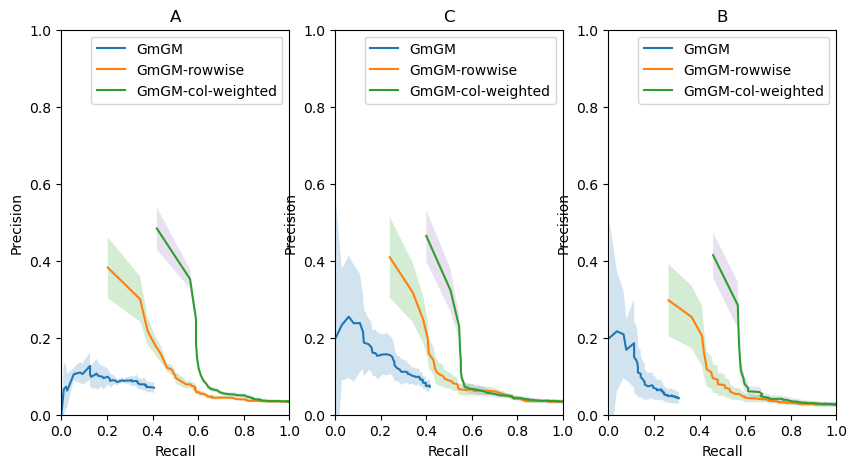

In [29]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


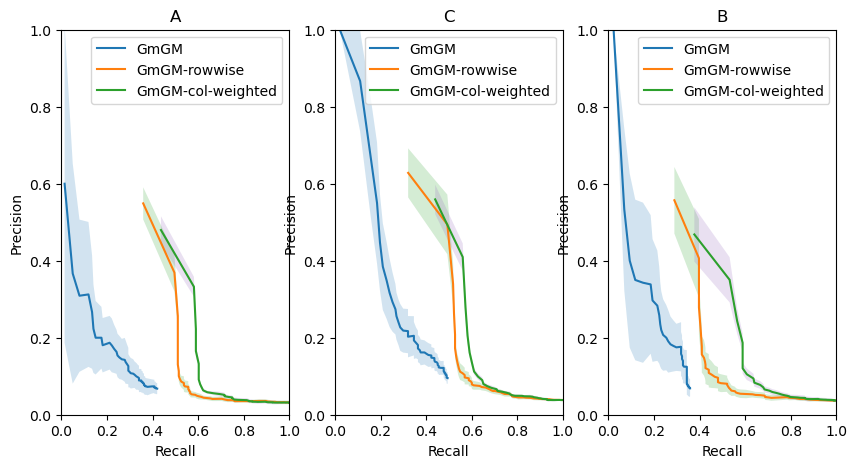

In [30]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


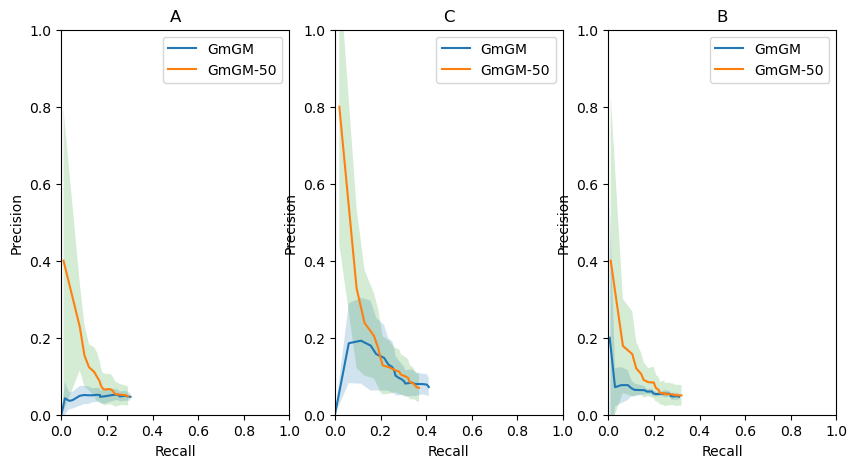

In [31]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


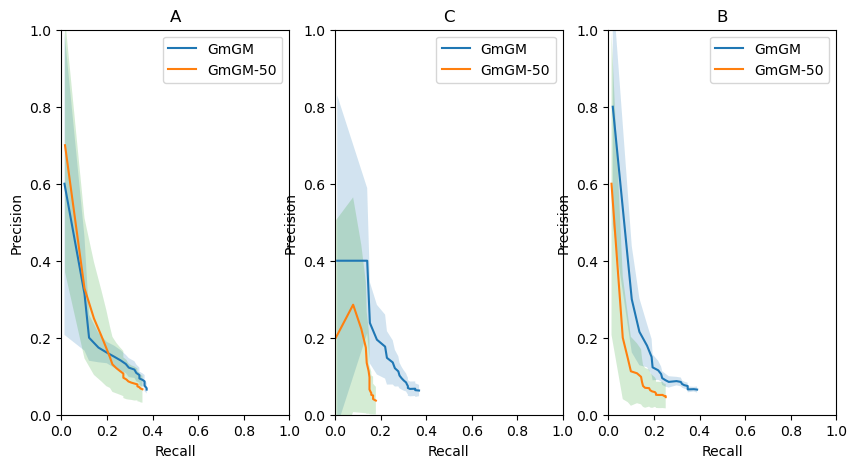

In [32]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Eight: Zero-Inflated

In [33]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(200)).reshape(1, 200))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.61431116 0.04184074 0.87013215 0.72456996 0.21468474 0.65455584
  0.30738348 0.05881067 0.14774824 0.10206223 0.02777325 0.50850767
  0.94613319 0.2328189  0.83944678 0.12978569 0.80245871 0.43039001
  0.60434117 0.87838256 0.35737822 0.64203079 0.98440735 0.95428098
  0.00300279 0.07631079 0.96422898 0.35582529 0.21468151 0.74237701
  0.10600864 0.29701083 0.37373012 0.18671479 0.3285091  0.85198097
  0.3169638  0.48427444 0.05656598 0.80882845 0.95840699 0.74266591
  0.16394383 0.39555542 0.6

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


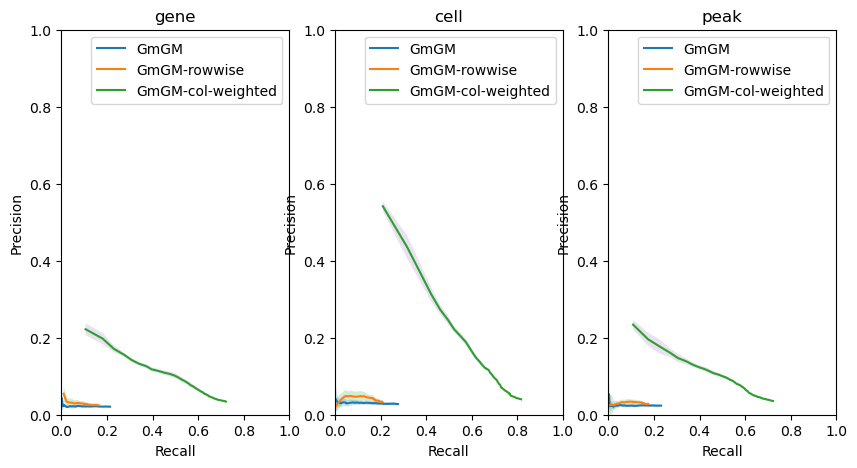

In [34]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


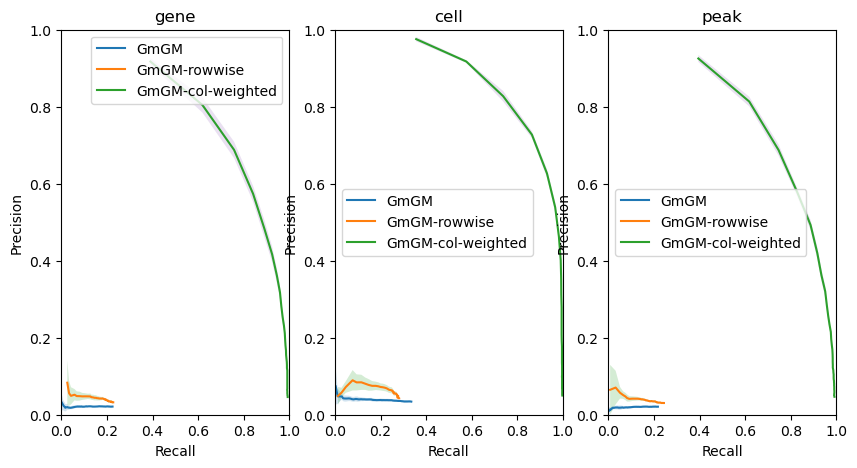

In [36]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


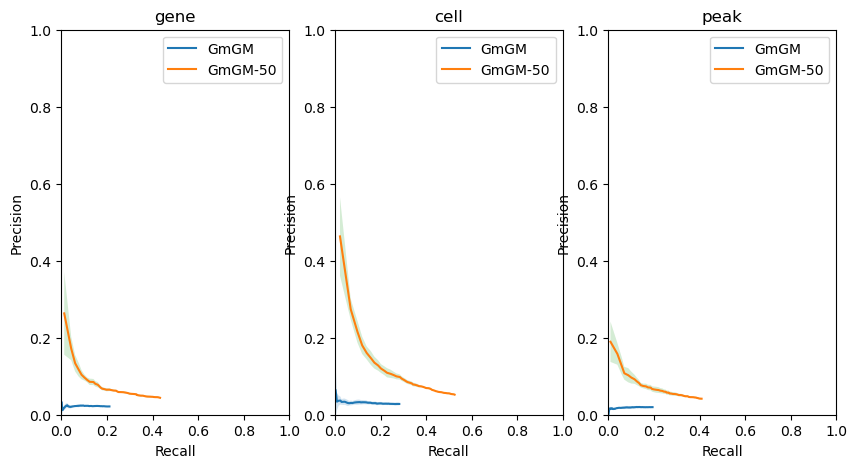

In [37]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


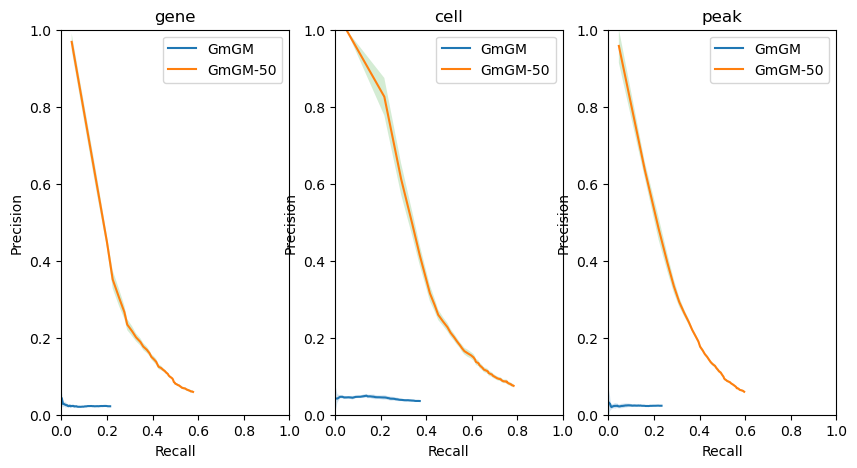

In [39]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


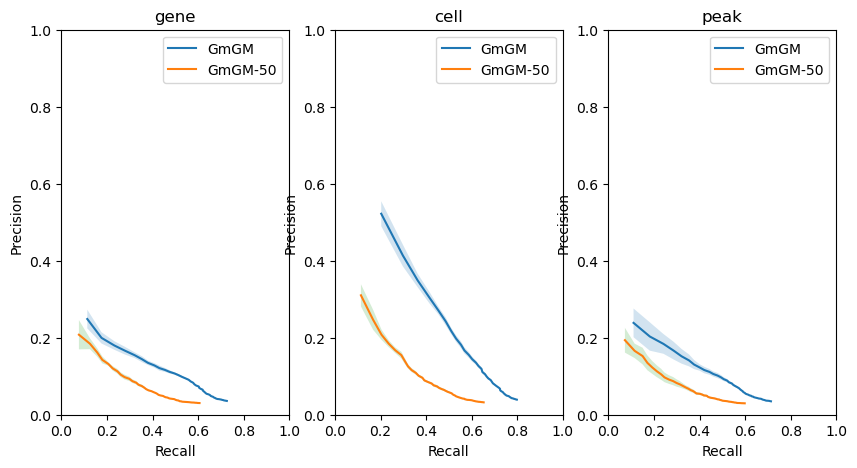

In [40]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


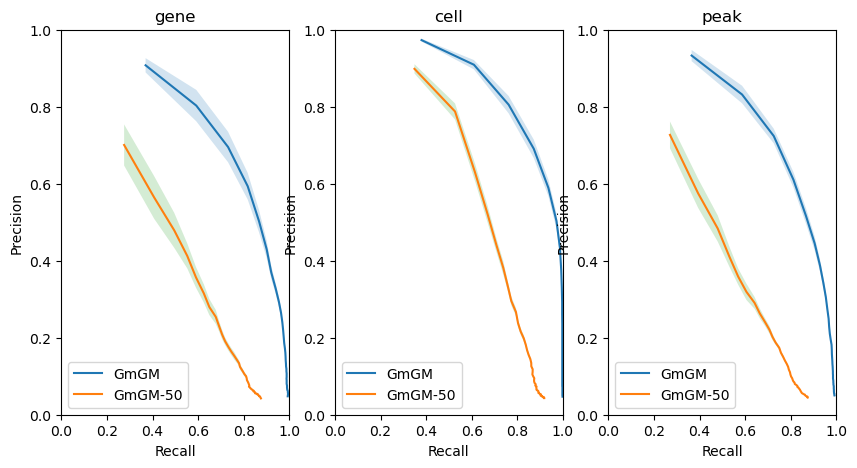

In [41]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Nine: Zero-Inflated, Low n_comps

In [42]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(200)).reshape(1, 200))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.72219593 0.24074955 0.29279472 0.4188255  0.46725896 0.76177679
  0.02928692 0.61487807 0.12103001 0.94701979 0.7217727  0.71757874
  0.20073818 0.51076611 0.35865173 0.2056497  0.06074712 0.18845125
  0.985042   0.67334715 0.88387734 0.68142716 0.82656662 0.27977692
  0.71581393 0.87873627 0.20045586 0.49492046 0.22802539 0.65799461
  0.01308202 0.77480954 0.92803845 0.55663646 0.34583654 0.76696036
  0.84757181 0.65856423 0.11753784 0.30964184 0.48833708 0.

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


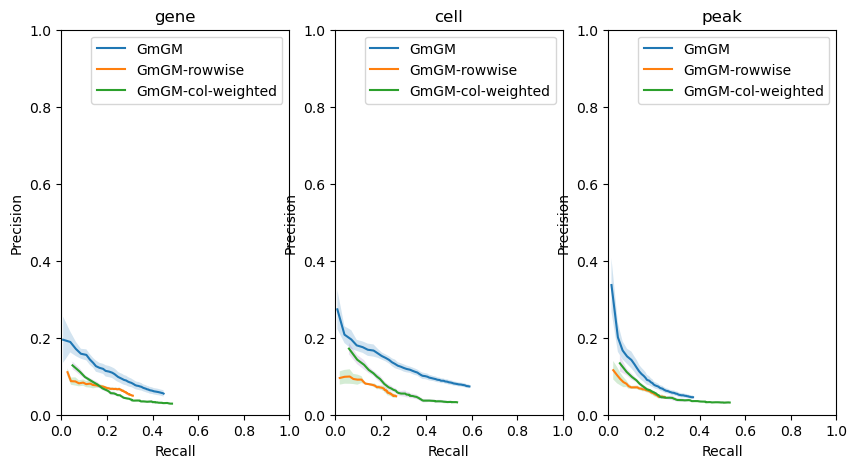

In [43]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


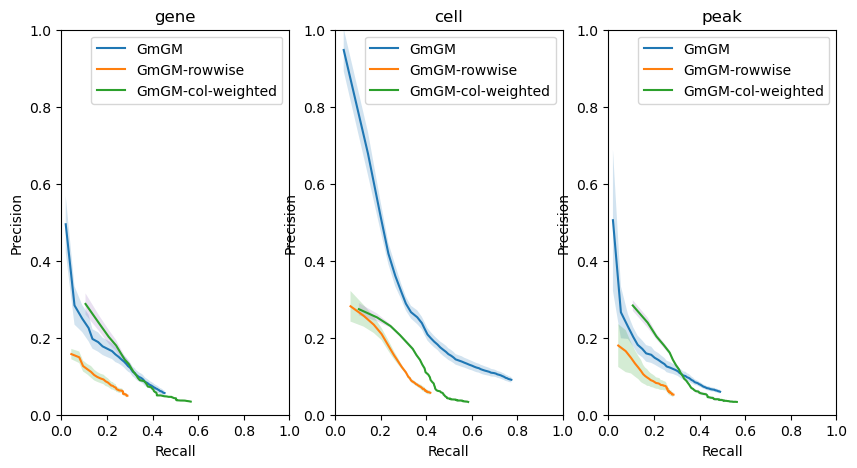

In [44]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


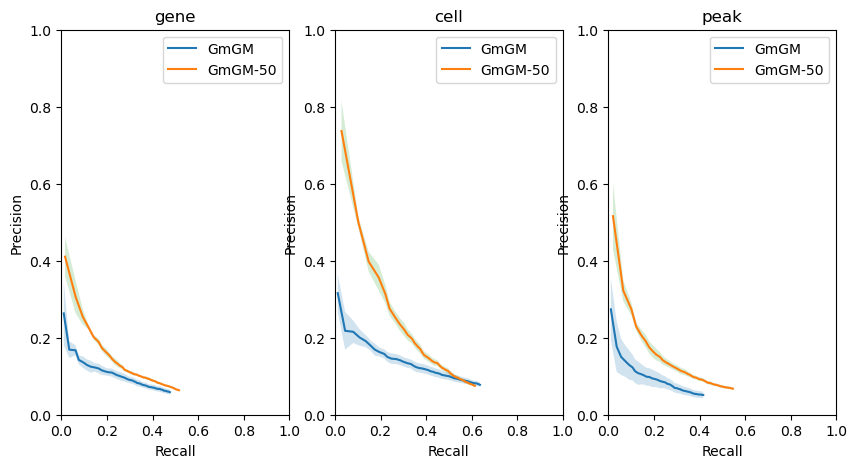

In [45]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


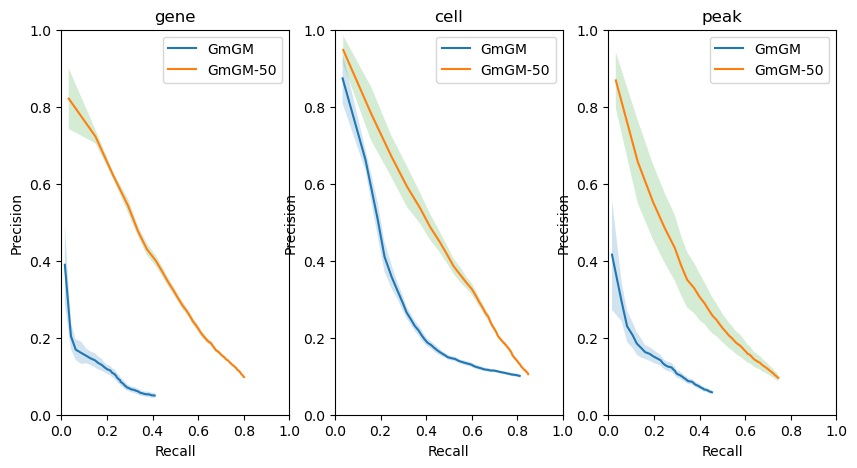

In [46]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


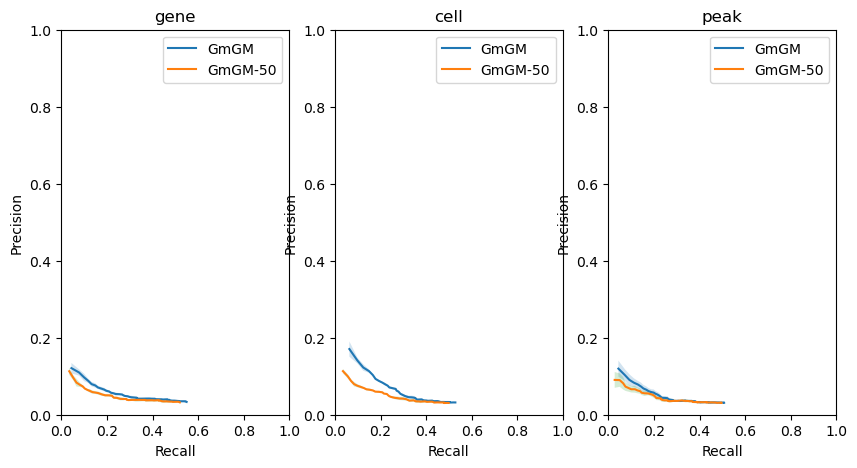

In [47]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


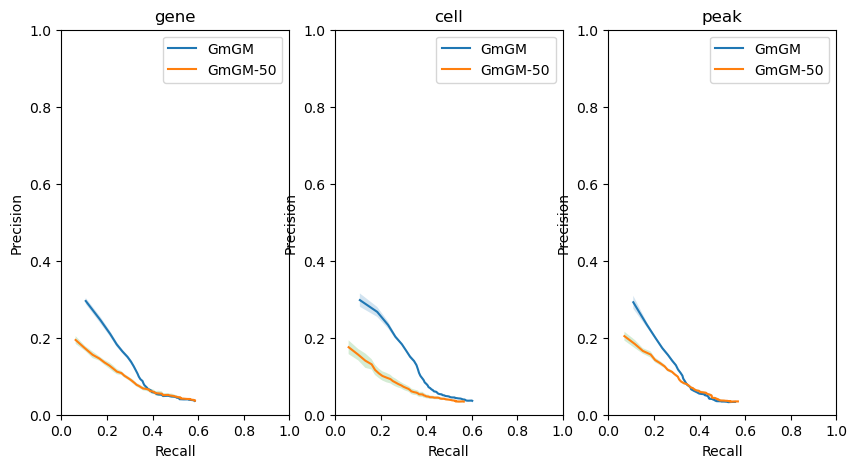

In [48]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

# Nonparanormal Experiments

## Experiment Ten: Normal; Nonparanormal Skeptic

In [2]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution="Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


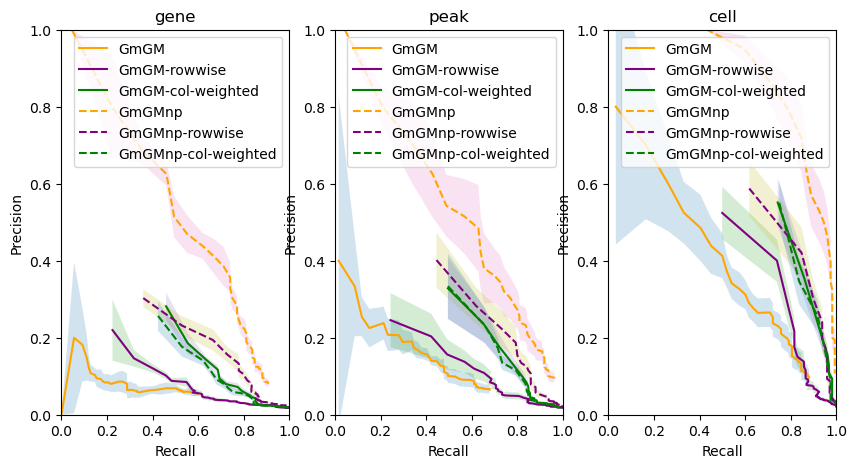

In [3]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5


Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


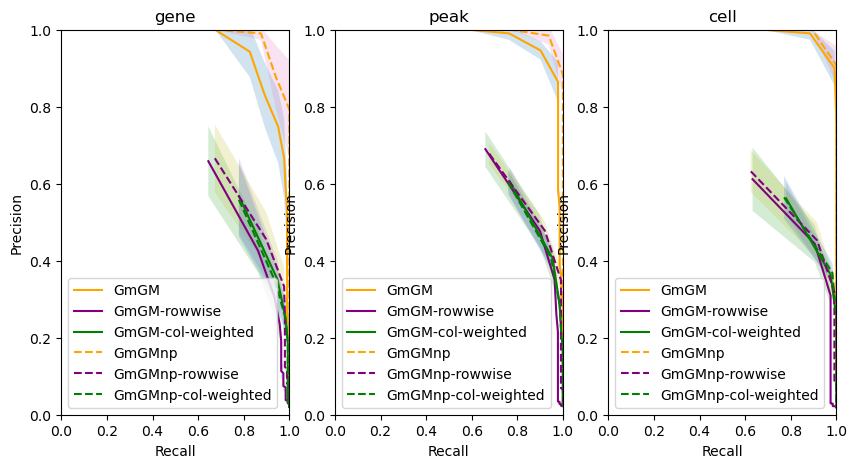

In [4]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

## Experiment Eleven: Nonpara, nonnormal

In [5]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


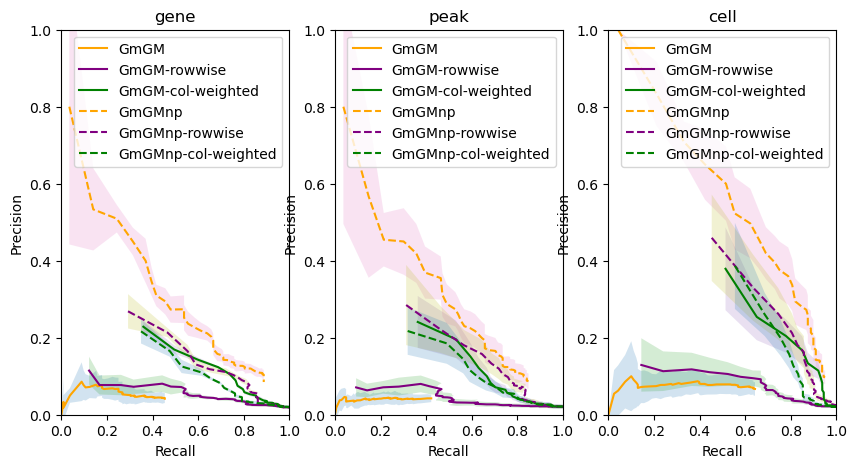

In [6]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


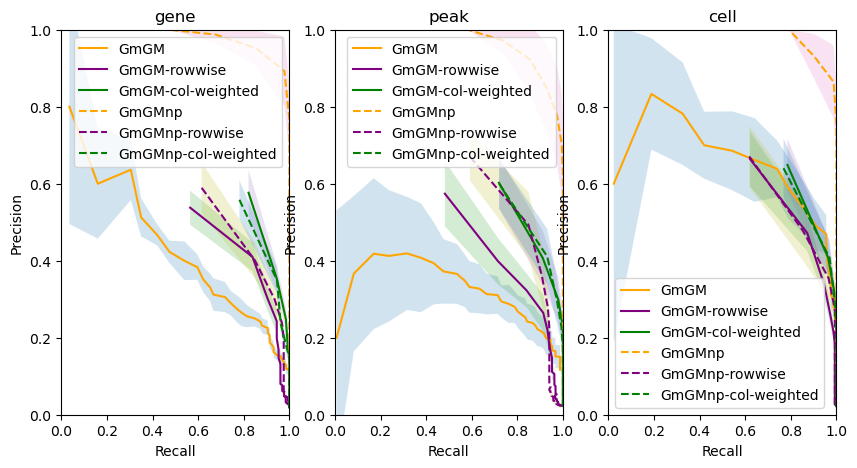

In [7]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

## Experiment Twelve: Nonparanormal, zero-inflated

In [8]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(50)).reshape(1, 50))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.82950226 0.36880264 0.32685572 0.70421544 0.87195018 0.13242631
  0.8298884  0.50183519 0.79725698 0.27697501 0.3366235  0.34484362
  0.0832521  0.01081379 0.41453606 0.99357922 0.76770204 0.28334816
  0.04690423 0.00968488 0.74828266 0.49055179 0.71899077 0.52565249
  0.87024639 0.78230346 0.60152564 0.31318504 0.92632622 0.55875376
  0.07220437 0.33463079 0.23770452 0.02168346 0.81189217 0.54480033
  0.10466813 0.88139148 0.14262301 0.82041734 0.48766766 0.95564358
  0.52674501 0.82817583 0.2333

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


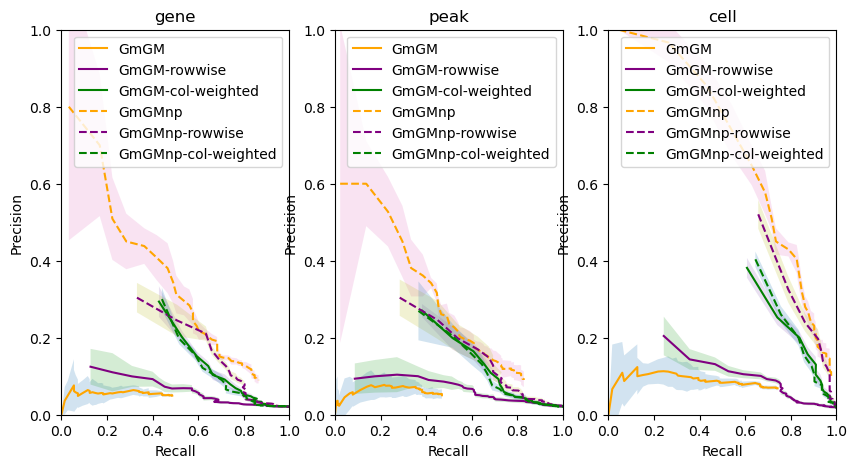

In [9]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


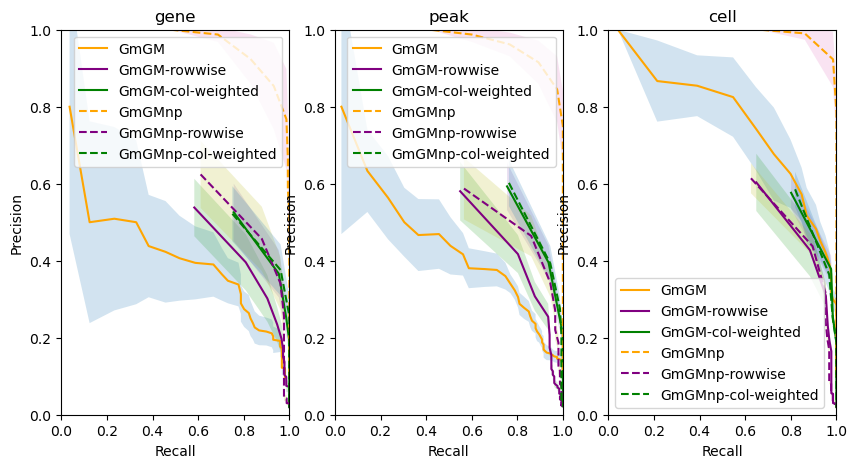

In [10]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

## Experiment Thirteen: Nonparanormal, Ziln-multinomial

Takeaways: `clr-prost` centering with `nonparanormal` and `overall` thresholding does best if interested in the main axis.  If interested in other axes, do terribly - but `rowwise-col-weighted` can recover some performance.  This is no surprise as the model generates the multinomial variables independently, thus making us loose the cell axis.  `rowwise-col-weighted` doing better than random is surprising.

In [2]:
from GmGM.synthetic import ZiLNMultinomial
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution=ZiLNMultinomial(
        np.random.uniform(size=(50)),
        np.random.randint(1, 200, size=(50))
    )
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Multinomial, truncation=[0.91686478 0.48831801 0.76139669 0.9328738  0.43451303 0.1308253
 0.55791942 0.77210518 0.71135036 0.66880398 0.74076451 0.89983897
 0.77553818 0.95210065 0.77895961 0.99158678 0.73220641 0.42893024
 0.45500452 0.23382866 0.08019637 0.07142717 0.59214549 0.81875456
 0.46833896 0.67167306 0.63712909 0.86619865 0.23189593 0.9988551
 0.33532952 0.98458113 0.74360725 0.85547582 0.93941421 0.75992766
 0.09804547 0.25902059 0.06569982 0.57652098 0.64893444 0.61460611
 0.86323219 0.13132847 0.24004511 0.8395

Attempt 1/5


Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


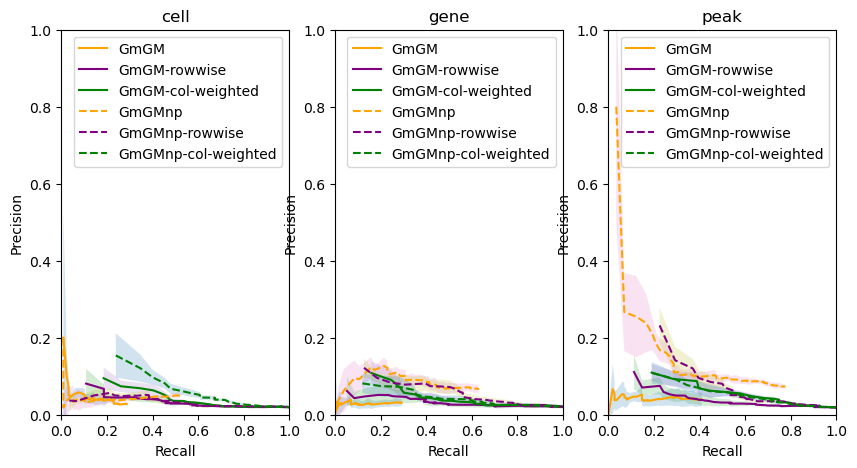

In [3]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


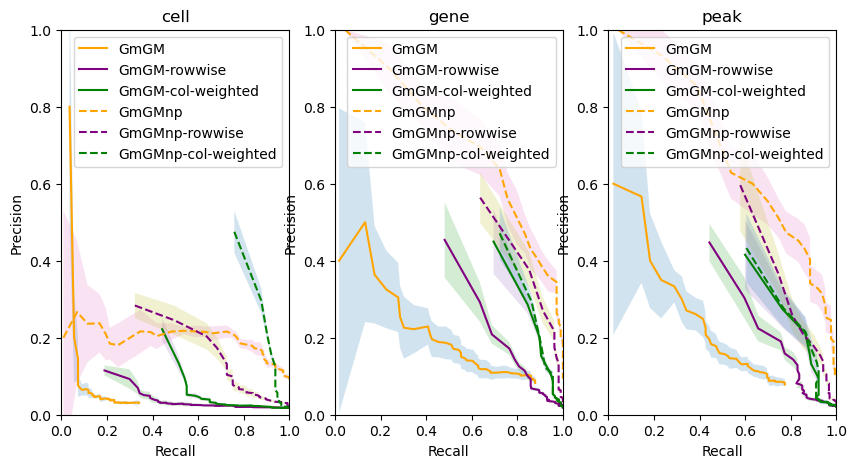

In [4]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


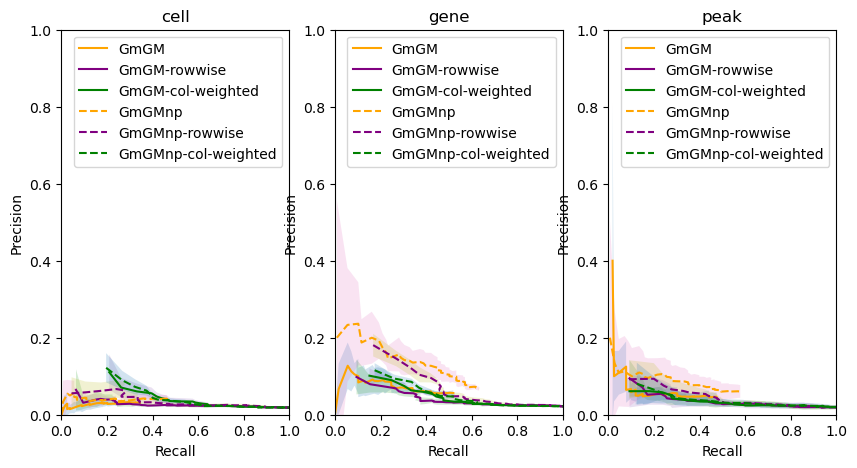

In [5]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", centering_method="clr-prost"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", centering_method="clr-prost"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True, centering_method="clr-prost")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


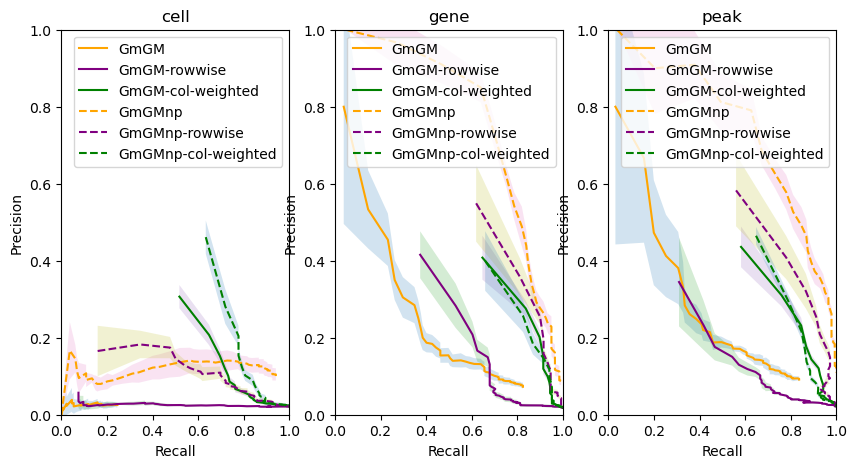

In [6]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", centering_method="clr-prost"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", centering_method="clr-prost"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True, centering_method="clr-prost")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


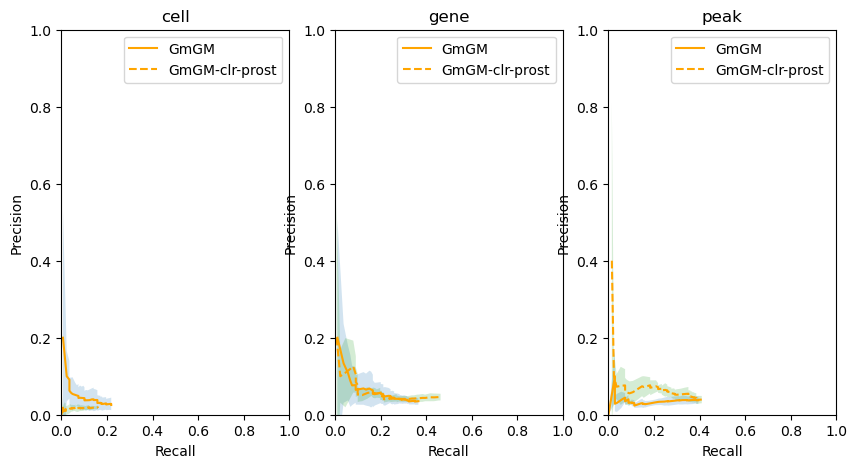

In [7]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-clr-prost": "orange",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-clr-prost": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


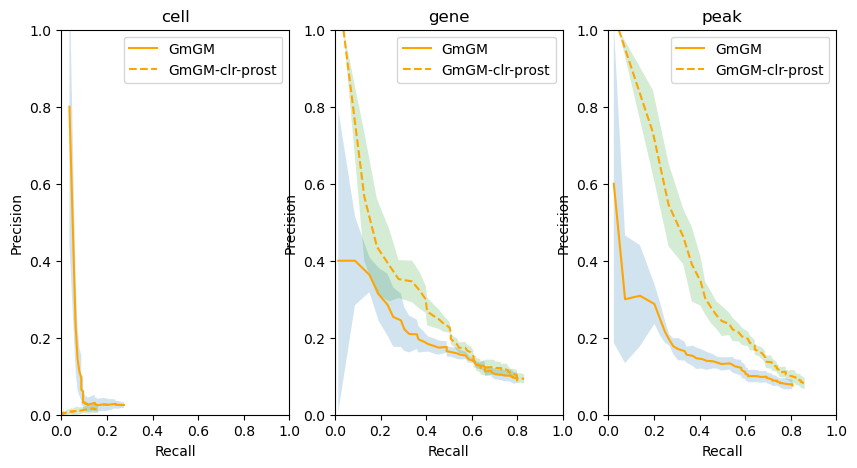

In [8]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-clr-prost": "orange",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-clr-prost": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


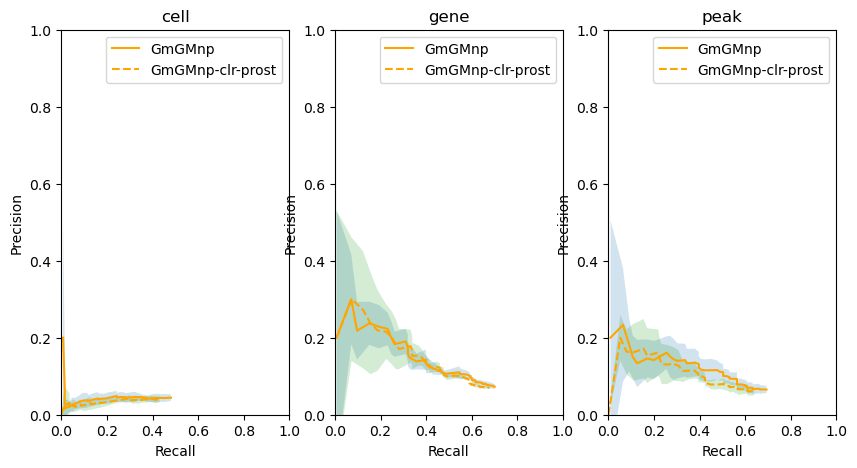

In [9]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost", use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGMnp": "orange",
        "GmGMnp-clr-prost": "orange",
    },
    linestyle={
        "GmGMnp": "-",
        "GmGMnp-clr-prost": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


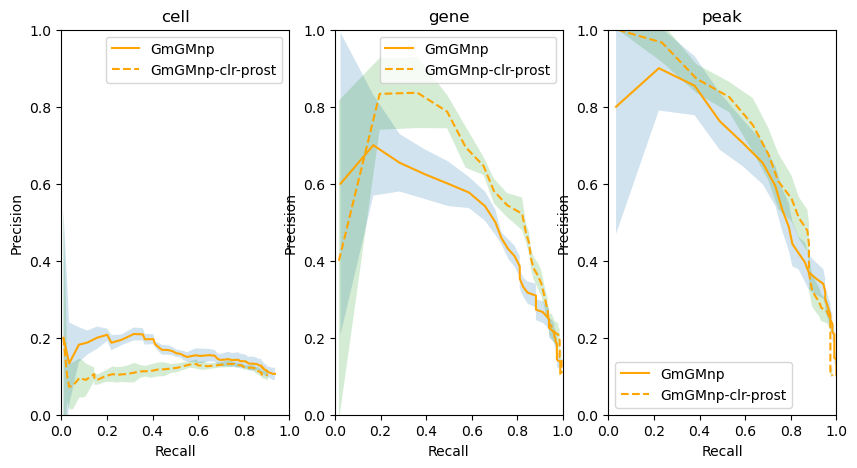

In [10]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost", use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGMnp": "orange",
        "GmGMnp-clr-prost": "orange",
    },
    linestyle={
        "GmGMnp": "-",
        "GmGMnp-clr-prost": "--",
    }
)
pass

# Further Tests

## Lopsided

In [11]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.05),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.05),
        ),
    },
    size={
        "cell": 200,
        "gene": 50,
        "peak": 50
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(50)).reshape(1, 50))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.05)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.05)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.81257297 0.36507938 0.42711039 0.56745451 0.11585856 0.10743441
  0.47771919 0.7871139  0.40396489 0.92522991 0.84130001 0.25143886
  0.86276254 0.86650764 0.79312955 0.98061953 0.69777442 0.55608564
  0.4992073  0.62905574 0.31630812 0.50518717 0.29542057 0.08619099
  0.56284454 0.25593628 0.34104548 0.45826831 0.2773356  0.16169585
  0.59049441 0.08327445 0.25071936 0.63704785 0.14217104 0.12095764
  0.10539778 0.88995411 0.42145442 0.79034187 0.5056954  0.20304234
  0.54855595 0.3151558  0.729

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


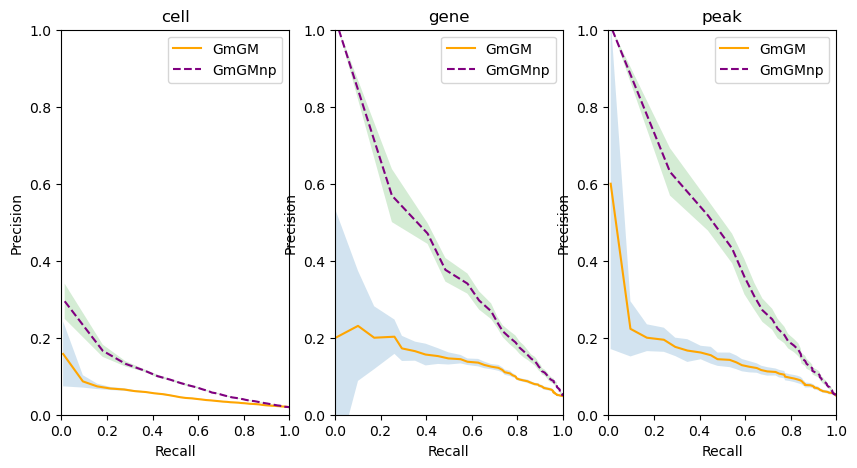

In [12]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 50),
        "GmGMnp": np.linspace(0.001, 1, 50),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGMnp": "purple",
    },
    linestyle={
        "GmGM": "-",
        "GmGMnp": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5


/Users/baileyandrew/mambaforge/envs/GmGM-python-demo/lib/python3.9/site-packages/GmGM/synthetic/generate_data.py:657: RuntimeWarning: overflow encountered in exp
  return np.exp(super().generate(
/Users/baileyandrew/mambaforge/envs/GmGM-python-demo/lib/python3.9/site-packages/GmGM/core/preprocessing.py:42: RuntimeWarning: invalid value encountered in subtract
  X.dataset[modality] = X.dataset[modality] - X.dataset[modality].mean()


Attempt 5/5


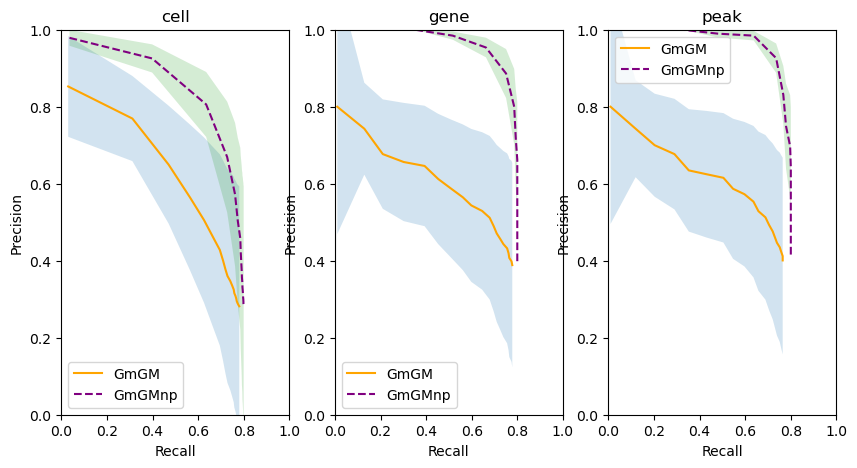

In [13]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGMnp": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGMnp": "purple",
    },
    linestyle={
        "GmGM": "-",
        "GmGMnp": "--",
    }
)
pass

## Nonparanormal Skeptic 

In [14]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=200
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=200
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=200
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(200)).reshape(1, 200))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=200>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=200>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=200>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[9.70444217e-01 4.68113499e-01 4.65907618e-01 5.88305911e-01
  9.23572413e-01 4.62524048e-01 8.34889412e-01 9.12639679e-01
  9.43755387e-01 8.81330123e-01 5.22275900e-01 2.86355952e-01
  9.50546233e-01 8.82023353e-01 6.36163872e-01 3.69101935e-01
  6.43526773e-01 1.67806440e-01 4.40530633e-01 9.11271055e-01
  3.32635448e-02 6.41004990e-01 1.55234684e-01 5.54555451e-01
  5.15541175e-02 9.34023538e-01 8.42925665e-01 4.54940024e-01
  3.24275145e-01 2.94023592e-0

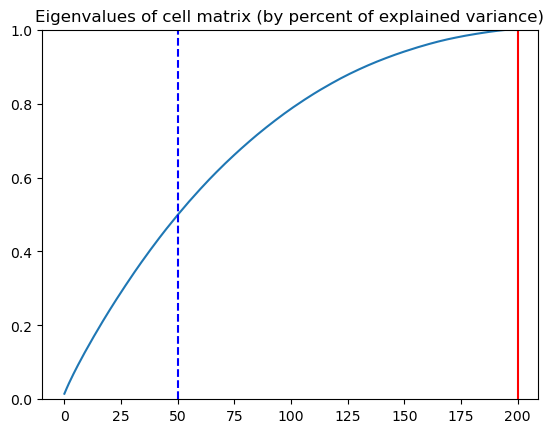

In [15]:
generator.reroll_Psis()
eigs = np.linalg.eigh(generator.Psis["cell"])[0][::-1]
eigs[eigs < 1e-12] = 1e-12
plt.plot((eigs/eigs.sum()).cumsum())
plt.ylim(0, 1)
n_comps = generator.generator["cell"].n_comps
if n_comps is not None:
    plt.axvline(n_comps, color="red")
plt.axvline(50, color="blue", linestyle="--")
plt.title("Eigenvalues of cell matrix (by percent of explained variance)")
pass

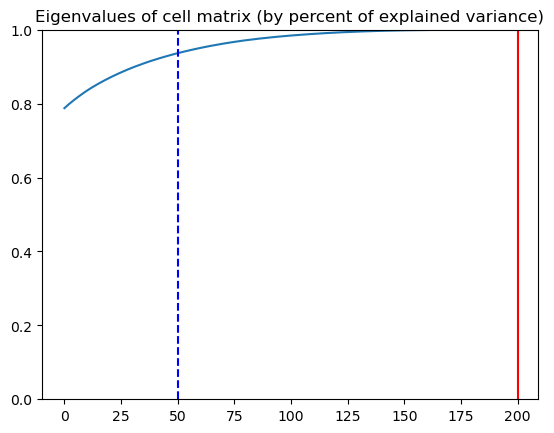

In [16]:
ds = generator.generate(num_samples=1).dataset["rna"].mean(axis=0)
eigs = np.linalg.eigh(ds @ ds.T)[0][::-1]
eigs[eigs < 1e-12] = 1e-12
plt.plot((eigs/eigs.sum()).cumsum())
plt.ylim(0, 1)
n_comps = generator.generator["cell"].n_comps
if n_comps is not None:
    plt.axvline(n_comps, color="red")
plt.axvline(50, color="blue", linestyle="--")
plt.title("Eigenvalues of cell matrix (by percent of explained variance)")
pass

Attempt 1/1
Lambda #0
Lambda #1
Lambda #2
Lambda #3
Lambda #4
Lambda #5
Lambda #6
Lambda #7
Lambda #8
Lambda #9
Lambda #10
Lambda #11
Lambda #12
Lambda #13
Lambda #14
Lambda #15
Lambda #16
Lambda #17
Lambda #18
Lambda #19


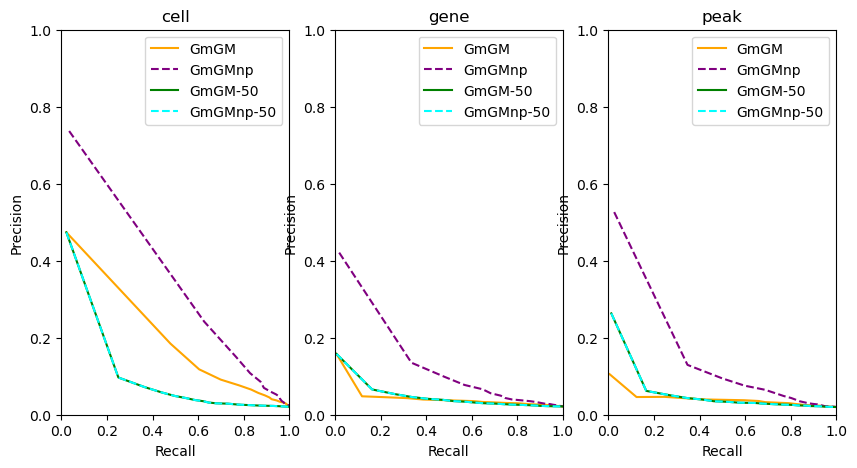

In [17]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
        "GmGMnp-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 20),
        "GmGMnp": np.linspace(0.001, 1, 20),
        "GmGM-50": np.linspace(0.001, 1, 20),
        "GmGMnp-50": np.linspace(0.001, 1, 20),
    },
    num_attempts=1,
    num_samples=1,
    verbose=2,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGMnp": "purple",
        "GmGM-50": "green",
        "GmGMnp-50": "cyan",
    },
    linestyle={
        "GmGM": "-",
        "GmGMnp": "--",
        "GmGM-50": "-",
        "GmGMnp-50": "--",
    }
)
pass

Attempt 1/1
Lambda #0
Lambda #1
Lambda #2
Lambda #3
Lambda #4
Lambda #5
Lambda #6
Lambda #7
Lambda #8
Lambda #9
Lambda #10
Lambda #11
Lambda #12
Lambda #13
Lambda #14
Lambda #15
Lambda #16
Lambda #17
Lambda #18
Lambda #19


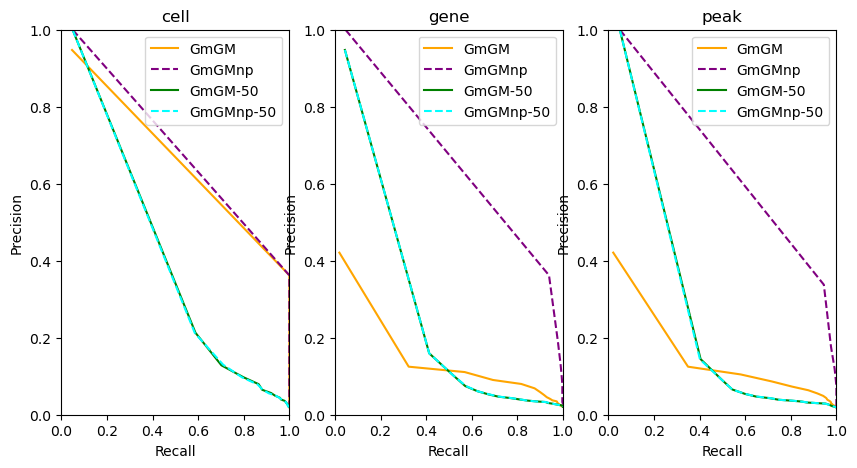

In [18]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
        "GmGMnp-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 20),
        "GmGMnp": np.linspace(0.001, 1, 20),
        "GmGM-50": np.linspace(0.001, 1, 20),
        "GmGMnp-50": np.linspace(0.001, 1, 20),
    },
    num_attempts=1,
    num_samples=10,
    verbose=2,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGMnp": "purple",
        "GmGM-50": "green",
        "GmGMnp-50": "cyan",
    },
    linestyle={
        "GmGM": "-",
        "GmGMnp": "--",
        "GmGM-50": "-",
        "GmGMnp-50": "--",
    }
)
pass